<a href="https://colab.research.google.com/github/CarolineAndradeR/Data-Science/blob/main/An%C3%A1lise_de_Conglomerados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Análise Aglomerados** - Procurar concentração de objetos (clientes, transações, produtos, comportamentos etc) com o objetivo de entender o porquê de tal aglomeração e claro, decidir o que podemos fazer com esse conhecimento.


**Cluster** - A criação de um cluster se baseia justamente em não conhecer a características em comum entre os objetos.
Um trabalho de análise de aglomerados pode nos levar á descoberta de um novo grupo, que por sua vez, terá características em comum.

A definição de um grupo de dados, literalmente,é que utilizamos dados já conhecidos sobre objetos para definir os grupos. Um cluster não é um resultado já conhecido. A criação de um cluster se baseia justamente em não conhecer a característica em comum entre os objetos.

Um aglomerado (ou Cluster) será o resultado da marcação de objetos (ou itens) como similaridade entre si.A ideia é percorrer os objetos de um conjunto (ou dataset) e marcar cada objeto como pertencente a um determinado cluster.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Axes: xlabel='wt', ylabel='mpg'>

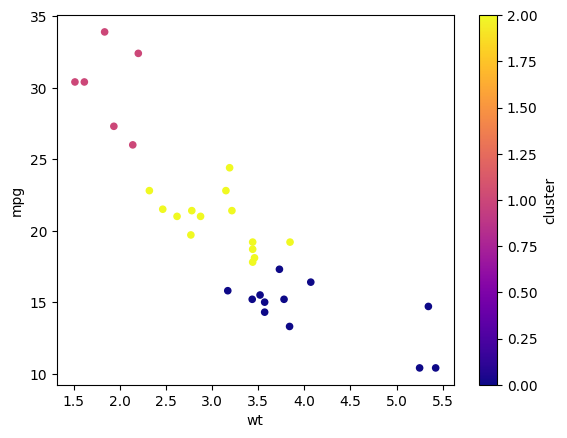

In [1]:
# carrega as bibliotecas pandas e Kmeans
import pandas as pd
from sklearn.cluster import KMeans
# carrega o dataset
df = pd.read_csv("https://raw.githubusercontent.com/diogenesjusto/FIAP-On-Line-Graduation/main/datasets/%20mtcars.csv")
# executa o algoritmo K-Means com 3 clusters, utilizando as variáveis mpg (milhas por galão) e wt (peso)
k = KMeans(n_clusters=3, random_state=0).fit(df[['mpg','wt']])
# adiciona o número do cluster (entre 0, 1 e 2) como uma nova coluna no dataframe
df['cluster'] = k.labels_
# visualização gráfico de dispersão das duas variáveis escolhidas, identificando no gráfico cada objeto o cluster ao qual pertence
df.plot.scatter(x='wt', y='mpg', c='cluster', colormap='plasma')

As métricas (variáveis) a ser utilizada no análise de aglomerados deverá ser feita a partir do conhecimento do problema a ser resolvido.

**Padronização**

* Verificar escalas das variáveis que serão utilizadas.
* Avaliar um método de padronização de variáveis.

<Axes: >

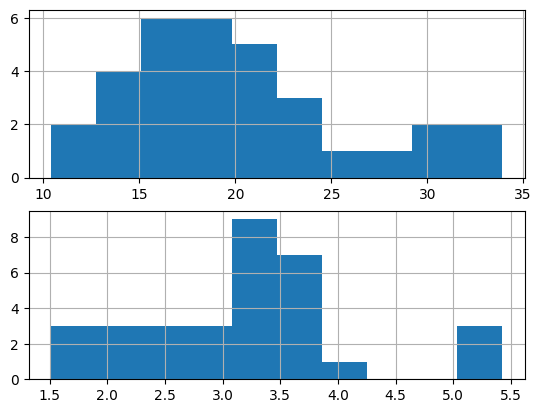

In [2]:
import matplotlib.pyplot as plt
# definindo uma janela lado a lado para geração dos histogramas das 2 variáveis
fig, axes = plt.subplots(2, 1)
# Padronização de variáveis
df['mpg'].hist(ax=axes[0])
df['wt'].hist(ax=axes[1])

**ESCALA DE VARIÁVEIS**



<Axes: >

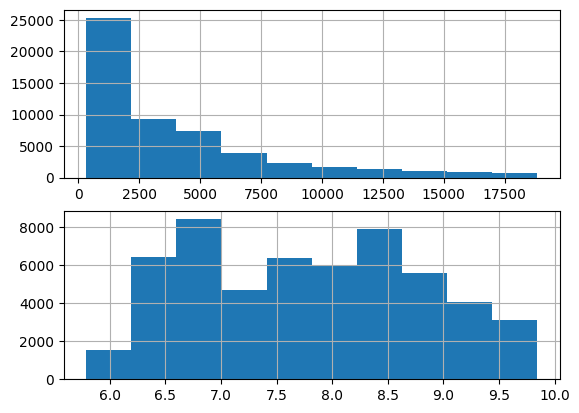

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# definindo uma janela lado a lado para geração dos histogramas das 2 variáveis
fig, axes = plt.subplots(2, 1)
# carrega dados
dfd = pd.read_csv("https://raw.githubusercontent.com/diogenesjusto/FIAP-On-Line-Graduation/main/datasets/diamonds.csv")
# constrói histograma de price
dfd['price'].hist(ax=axes[0])
# aplica uma transformação logarítmica na variável price
dfd['price_log'] = np.log(dfd['price'])
dfd['price_log'].hist(ax=axes[1])

**MÉTODOS DE AJUSTE DE ESCALA**

Alguns métodos estatísticos de ajuste de escala comumente utilizados:

* MÉTODO Z-PADRÃO - Transforma as variáveis de tal forma que fiquem com média zero e desvio-padrão 1
z= (X - média (X)) / DESVPAD (x)

* METODO DE RANGE 0 a 1 ou -1 a 1: Transforma a variável numérica tal que todos os valores fiquem entre 0 e 1 ou -1 e 1
[0 a 1]: X / AMPLITUDE (X)
[-1 a 1]:(X - MIN (x)) / AMPLITUDE (X)
onde AMPLITUDE(x) = MAX(X) - MIN(X)

* METODO DE MÉDIA 1: transforma a variável numérica tal que na média seja 1 (basta dividir a variável pela média)
X / MÉDIA(X)

* METODO DA MAXIMA AMPLITUDE: após a transformação o valor máximo é 1
X / MAX(x)

In [4]:
# Métodos estatísticos de ajuste de escala
# Retornando a base mtcars
# M1 - Z-Pdrão
from scipy.stats import zscore
df['mpg_z'], df['wt_z'] = (df['mpg']-df['mpg'].mean() )/ df['mpg'].std(), zscore(df['wt'])
# M2 - Range 0 a 1, -1 a 1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df['mpg_r01'], df['wt_r01'] = scaler.fit_transform(df[['mpg']]), scaler.fit_transform(df[['wt']])
# M3 - Máxima Amplitude
df['mpg_ma'], df['wt_ma'] = df['mpg']/df['mpg'].max(), df['wt']/df['wt'].max()
# M4 - Média 1
df['mpg_m1'], df['wt_m1'] = df['mpg']/df['mpg'].mean(), df['wt']/df['wt'].mean()
# Visualização das novas variáveis transformadas
df.loc[:,'mpg_z':'wt_m1'].head()

,mpg_z,wt_z,mpg_r01,wt_r01,mpg_ma,wt_ma,mpg_m1,wt_m1
0,0.150885,-0.620167,0.451064,0.283048,0.619469,0.483038,1.045264,0.814360
1,0.150885,-0.355382,0.451064,0.348249,0.619469,0.530052,1.045264,0.893620
2,0.449543,-0.931678,0.527660,0.206341,0.672566,0.427729,1.134858,0.721113
3,0.217253,-0.002336,0.468085,0.435183,0.631268,0.592736,1.065173,0.999301
4,-0.230735,0.231297,0.353191,0.492713,0.551622,0.634218,0.930782,1.069236


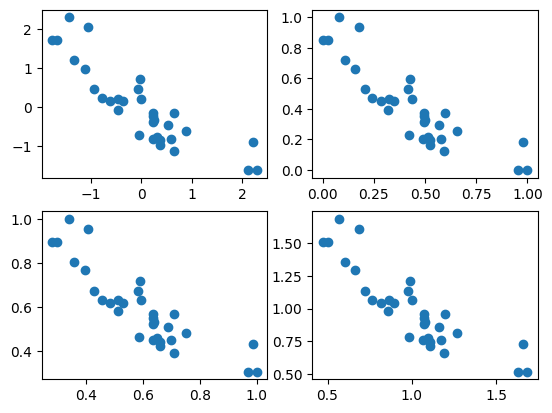

In [5]:
# Geração dos gráficos de dispersão com as novas variáveis
fig = plt.figure()
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)
ax1.scatter(df['wt_z'], df['mpg_z'])
ax2.scatter(df['wt_r01'], df['mpg_r01'])
ax3.scatter(df['wt_ma'], df['mpg_ma'])
ax4.scatter(df['wt_m1'], df['mpg_m1'])

**MEDIDAS DE DISTÂNCIA E SIMILARIDADE**

No campo de analise de aglomerados, precisamos definir o que são objetos similares. A forma mais simples de entendemos é pensando num aglomerado de itens que estão próximos.

Podemos pensar que a similaridade é justamente o inverso da distância, quanto mais distantes estão os itens, menos similares eles serão e vice-versa.

Distância euclidiana que usualmente entendemos somente como distância.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Axes: xlabel='wt', ylabel='mpg'>

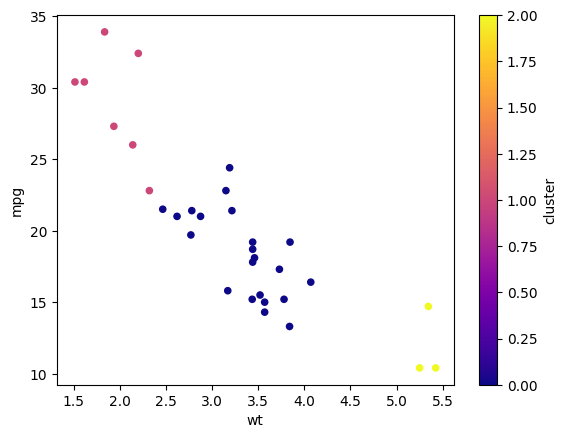

In [6]:
# executa o algoritmo K-Means com 3 clusters, utilizando as variáveis mpg (milhas por galão) e wt (peso)
k = KMeans(n_clusters=3, random_state=0).fit(df[['mpg_r01','wt_r01']])
# adiciona o número do cluster (entre 0, 1 e 2) como uma nova coluna no dataframe
df['cluster'] = k.labels_
# visualização gráfico de dispersão das duas variáveis escolhidas, identificando no gráfico cada objeto o cluster ao qual pertence
df.plot.scatter(x='wt', y='mpg', c='cluster', colormap='plasma')

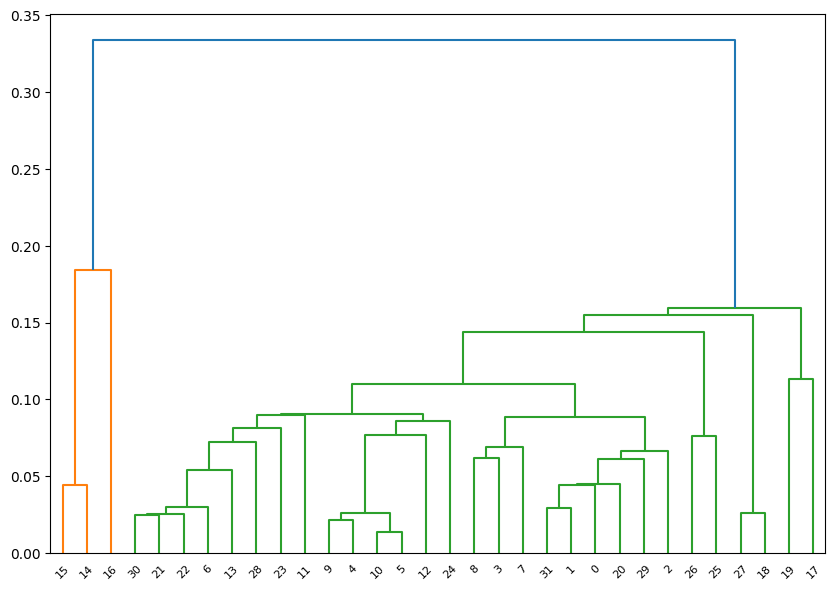

In [8]:
# Cluster hierárquico
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
linked = linkage(df[['mpg_r01','wt_r01']], 'single')
labelList = range(0, 32)
plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()